In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
bank_data=pd.read_csv("Dataset_LR/bank_chunkPrediction")

In [3]:
bank_data.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [4]:
bank_data.describe()

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
count,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,...,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.000000,175028.0,175028.000000
mean,1617.462812,656.113068,38.171337,5.019968,56676.772103,1.553072,0.751183,0.498754,42116.386018,0.211149,...,0.566909,0.212046,0.221045,0.436644,0.563356,0.784989,0.041816,0.000069,0.0,191.346929
std,813.852174,81.148273,8.969565,2.811155,62982.418525,0.549212,0.432329,0.500000,62545.527331,0.408125,...,0.495504,0.408758,0.414952,0.495971,0.495971,0.871599,5.305641,0.008280,0.0,118.745788
min,0.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,949.000000,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,93.000000
50%,1666.000000,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,180.000000
75%,2292.000000,710.000000,42.000000,7.000000,120727.970000,2.000000,1.000000,1.000000,88554.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.0,272.000000
max,2931.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,805.000000,1.000000,0.0,880.000000


In [31]:
bank_data.shape

(175028, 25)

In [5]:
bank_data.shape

(175028, 25)

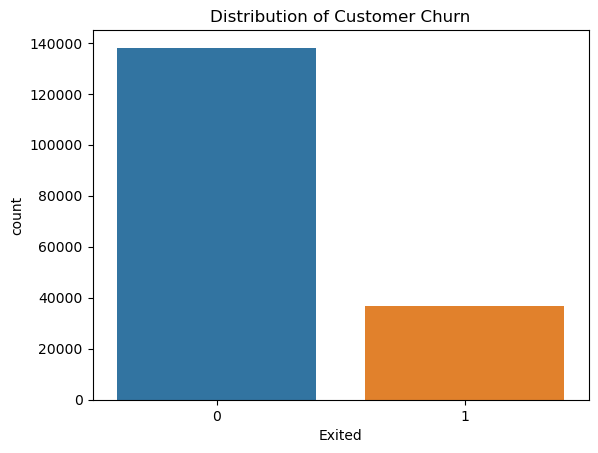

In [6]:
# Distribution of the target variable 'Exited'
sns.countplot(x='Exited', data=bank_data)
plt.title('Distribution of Customer Churn')
plt.show()

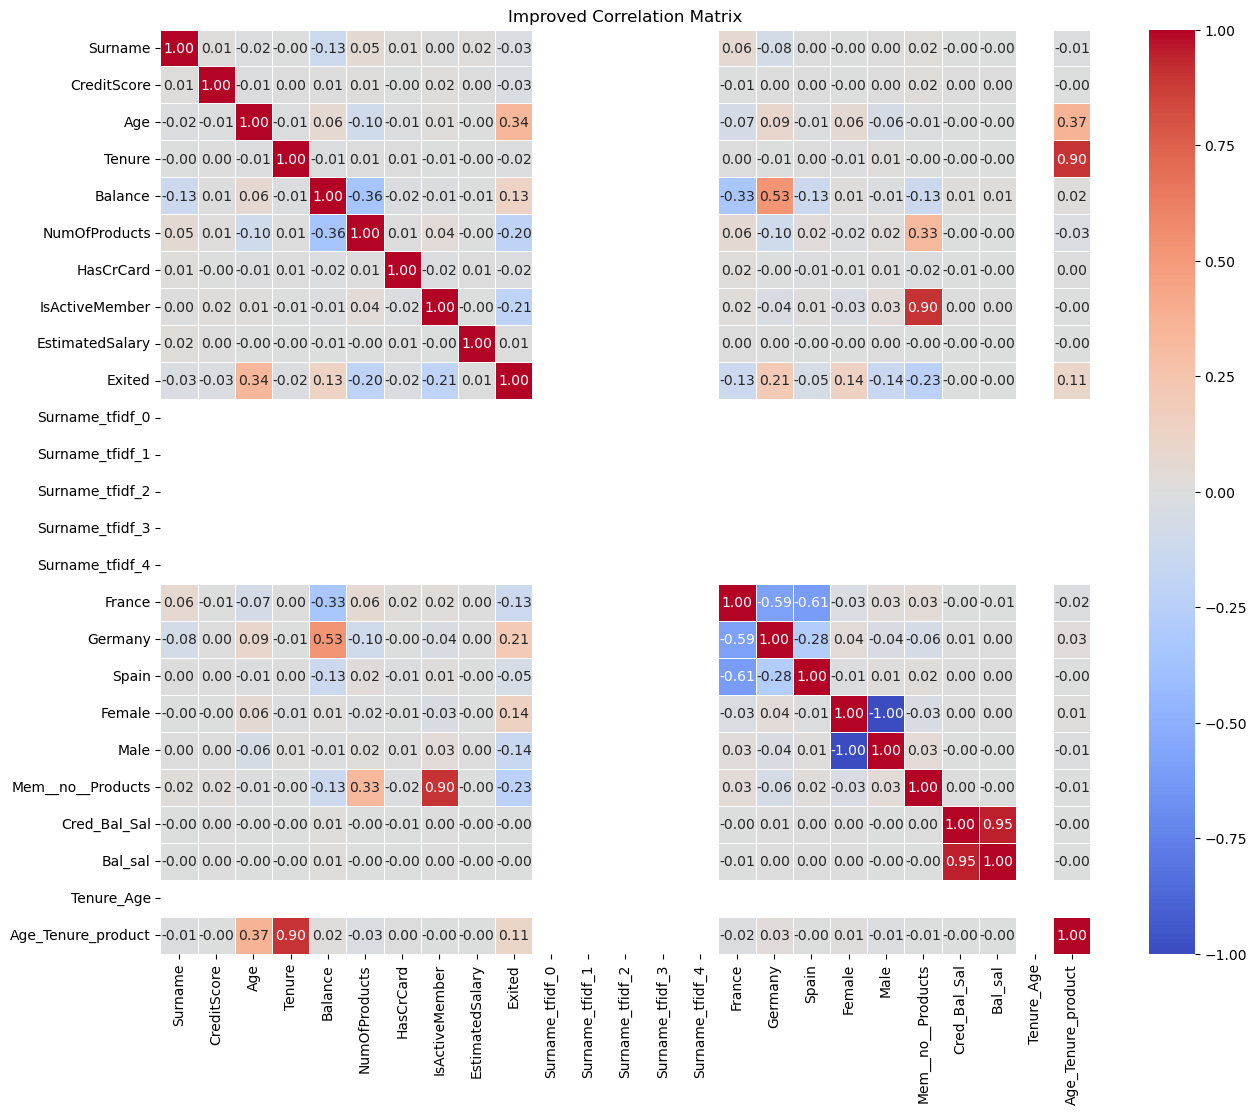

In [7]:
# Correlation matrix
corr_matrix = bank_data.corr()

# Improve the visualization of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Improved Correlation Matrix')
plt.show()

## Build Machine Learning Model

In [8]:

# Drop 'Exited' from features to create X and set 'Exited' as the target variable
X = bank_data.drop('Exited', axis=1)
y = bank_data['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [10]:
# Initialize and train the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:

# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [13]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.80

Confusion Matrix:
[[23942  3664]
 [ 3447  3953]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     27606
           1       0.52      0.53      0.53      7400

    accuracy                           0.80     35006
   macro avg       0.70      0.70      0.70     35006
weighted avg       0.80      0.80      0.80     35006



## Random Forest

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [15]:
# Drop 'Exited' from features to create X and set 'Exited' as the target variable
X = bank_data.drop('Exited', axis=1)
y = bank_data['Exited']

In [16]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize and train the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [18]:
# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)


In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [20]:
x = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.86

Confusion Matrix:
[[26088  1518]
 [ 3472  3928]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     27606
           1       0.72      0.53      0.61      7400

    accuracy                           0.86     35006
   macro avg       0.80      0.74      0.76     35006
weighted avg       0.85      0.86      0.85     35006



In [21]:

from sklearn.metrics import classification_report, confusion_matrix

In [22]:
y_pred = random_forest_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.95      0.91     27606
           1       0.72      0.53      0.61      7400

    accuracy                           0.86     35006
   macro avg       0.80      0.74      0.76     35006
weighted avg       0.85      0.86      0.85     35006



## Visualization

In [23]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix

In [24]:
y_pred = random_forest_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.95      0.91     27606
           1       0.72      0.53      0.61      7400

    accuracy                           0.86     35006
   macro avg       0.80      0.74      0.76     35006
weighted avg       0.85      0.86      0.85     35006



Text(0.5, 1.0, 'Accuracy Score: 0.8574530080557619')

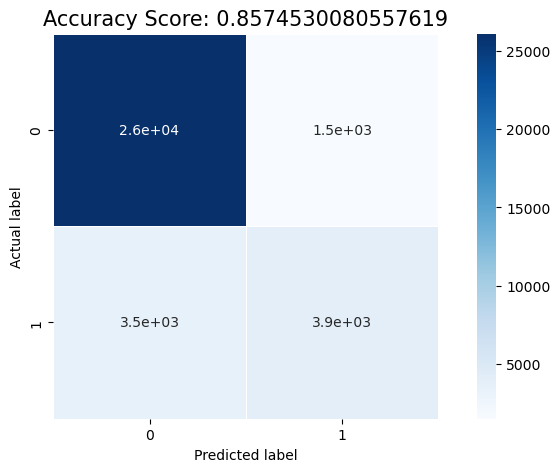

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(random_forest_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

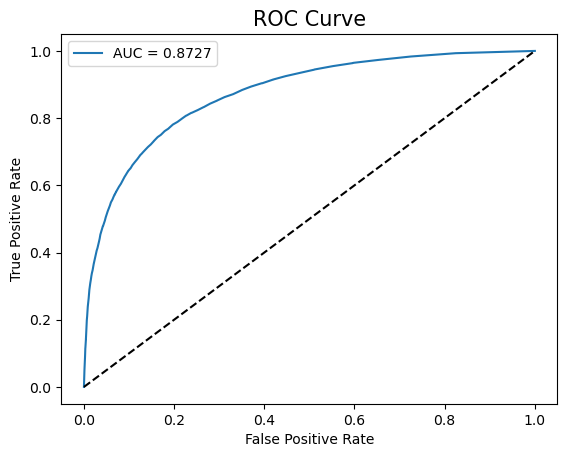

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = random_forest_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

## XGboost visualization

In [27]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.55087699251557 %


In [28]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.89      0.95      0.92     27606
           1       0.74      0.56      0.64      7400

    accuracy                           0.87     35006
   macro avg       0.81      0.75      0.78     35006
weighted avg       0.86      0.87      0.86     35006



Text(0.5, 1.0, 'Accuracy Score: 0.8655087699251557')

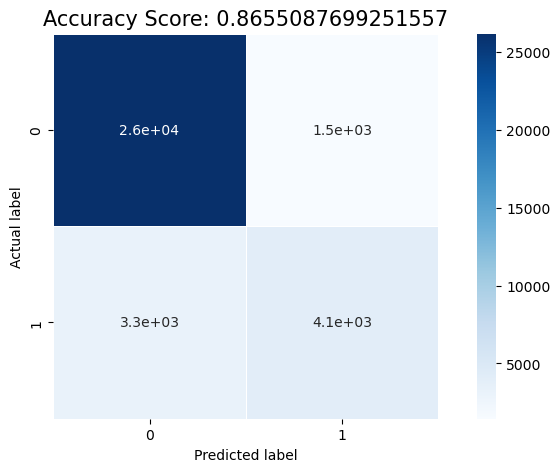

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

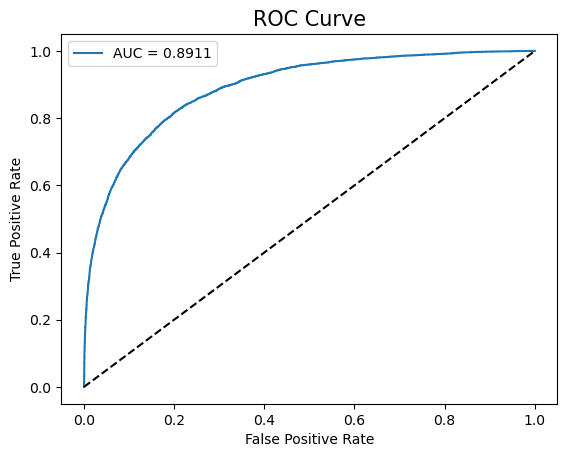

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

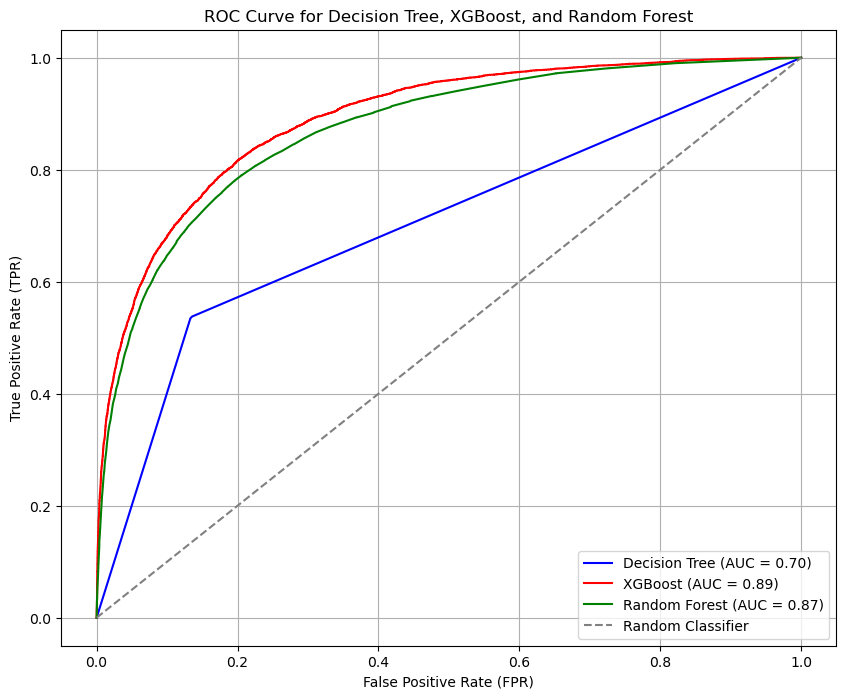

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming you have the features (X) and target variable (y) in your dataset
# Replace X and y with your actual feature matrix and target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', color='red')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Customize the plot
plt.title('ROC Curve for Decision Tree, XGBoost, and Random Forest')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid(True)
plt.show()
